# Pulsar Classification Project Proposal
###### By Bernie Leung, Phillip Li, Glen Ren, and Helena Tremblay

### Introduction
Pulsars are rapidly spinning, uber-dense neutron stars. These neutrons are the collapsed cores of massive supergiant stars and emit rhythmic pulses of strong radiation due to their electromagnetism dipoles. While pulsars are rotating and emitting light at regular intervals, to the observers on earth, the pulsars are twinkling.  

For this project, we will be using the HTRU2 dataset and classifying the given candidates as pulsar or noise. The sample of pulsar candidates from the HTRU2 dataset was collected during the High Time Resolution Universe Survey, which “intends to be an all-sky survey for pulsars and short-duration radio transients, with a strong focus on the lower Galactic latitudes, [where the higher frequency resolution for the negation of interstellar dispersion are made used the most.]”

Binary classification systems are now being widely adopted for this matter, and will be used to represent whether the pulsar is real or not. In this data set, the legitimate pulsar examples are a minority positive class, and spurious examples are the majority negative class. 

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

The data is presented in two formats: CSV and ARFF (used by the WEKA data mining tool). Candidates are stored in both files in separate rows. Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

In [9]:
library(tidyverse)
library(repr)
library(readxl)

Introduction:

Pulsars are rapidly spinning, uber-dense neutron stars. These neutrons are the collapsed cores of massive supergiant stars and emit rhythmic pulses of strong radiation due to their electromagnetism dipoles. While pulsars are rotating and emitting light at regular intervals, to the observers on earth, the pulsars are twinkling.  

For this project, we will be using the HTRU2 dataset and classifying the given candidates as pulsar or noise. The sample of pulsar candidates from the HTRU2 dataset was collected during the High Time Resolution Universe Survey, which “intends to be an all-sky survey for pulsars and short-duration radio transients, with a strong focus on the lower Galactic latitudes, [where the higher frequency resolution for the negation of interstellar dispersion are made used the most.]”

Binary classification systems are now being widely adopted for this matter, and will be used to represent whether the pulsar is real or not. In this data set, the legitimate pulsar examples are a minority positive class, and spurious examples are the majority negative class. 

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

The data is presented in two formats: CSV and ARFF (used by the WEKA data mining tool). Candidates are stored in both files in separate rows. Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

No documentation for ‘read_csv’ in specified packages and libraries:
you could try ‘??read_csv’

In [10]:
pulsar_data <- read_csv("https://raw.githubusercontent.com/glenren/dsci_100_group_24/main/HTRU_2.csv", col_names = c("Mean of the integrated profile", 
    "Standard deviation of the integrated profile",
    "Excess kurtosis of the integrated profile",
    "Skewness of the integrated profile",
    "Mean of the DM-SNR curve",
    "Standard deviation of the DM-SNR curve",
    "Excess kurtosis of the DM-SNR curve",
    "Skewness of the DM-SNR curve",
    "Class") ) %>%
    mutate(Class = as_factor(Class))

colnames(pulsar_data) <- make.names(colnames(pulsar_data))

pulsar_data

Parsed with column specification:
cols(
  `Mean of the integrated profile` = col_double(),
  `Standard deviation of the integrated profile` = col_double(),
  `Excess kurtosis of the integrated profile` = col_double(),
  `Skewness of the integrated profile` = col_double(),
  `Mean of the DM-SNR curve` = col_double(),
  `Standard deviation of the DM-SNR curve` = col_double(),
  `Excess kurtosis of the DM-SNR curve` = col_double(),
  `Skewness of the DM-SNR curve` = col_double(),
  Class = col_double()
)



Mean.of.the.integrated.profile,Standard.deviation.of.the.integrated.profile,Excess.kurtosis.of.the.integrated.profile,Skewness.of.the.integrated.profile,Mean.of.the.DM.SNR.curve,Standard.deviation.of.the.DM.SNR.curve,Excess.kurtosis.of.the.DM.SNR.curve,Skewness.of.the.DM.SNR.curve,Class
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
140.56250,55.68378,-0.234571412,-0.69964840,3.1998328,19.110426,7.975532,74.24222,0
102.50781,58.88243,0.465318154,-0.51508791,1.6772575,14.860146,10.576487,127.39358,0
103.01562,39.34165,0.323328365,1.05116443,3.1212375,21.744669,7.735822,63.17191,0
136.75000,57.17845,-0.068414638,-0.63623837,3.6429766,20.959280,6.896499,53.59366,0
88.72656,40.67223,0.600866079,1.12349169,1.1789298,11.468720,14.269573,252.56731,0
93.57031,46.69811,0.531904850,0.41672112,1.6362876,14.545074,10.621748,131.39400,0
119.48438,48.76506,0.031460220,-0.11216757,0.9991639,9.279612,19.206230,479.75657,0
130.38281,39.84406,-0.158322759,0.38954045,1.2207358,14.378941,13.539456,198.23646,0
107.25000,52.62708,0.452688025,0.17034738,2.3319398,14.486853,9.001004,107.97251,0


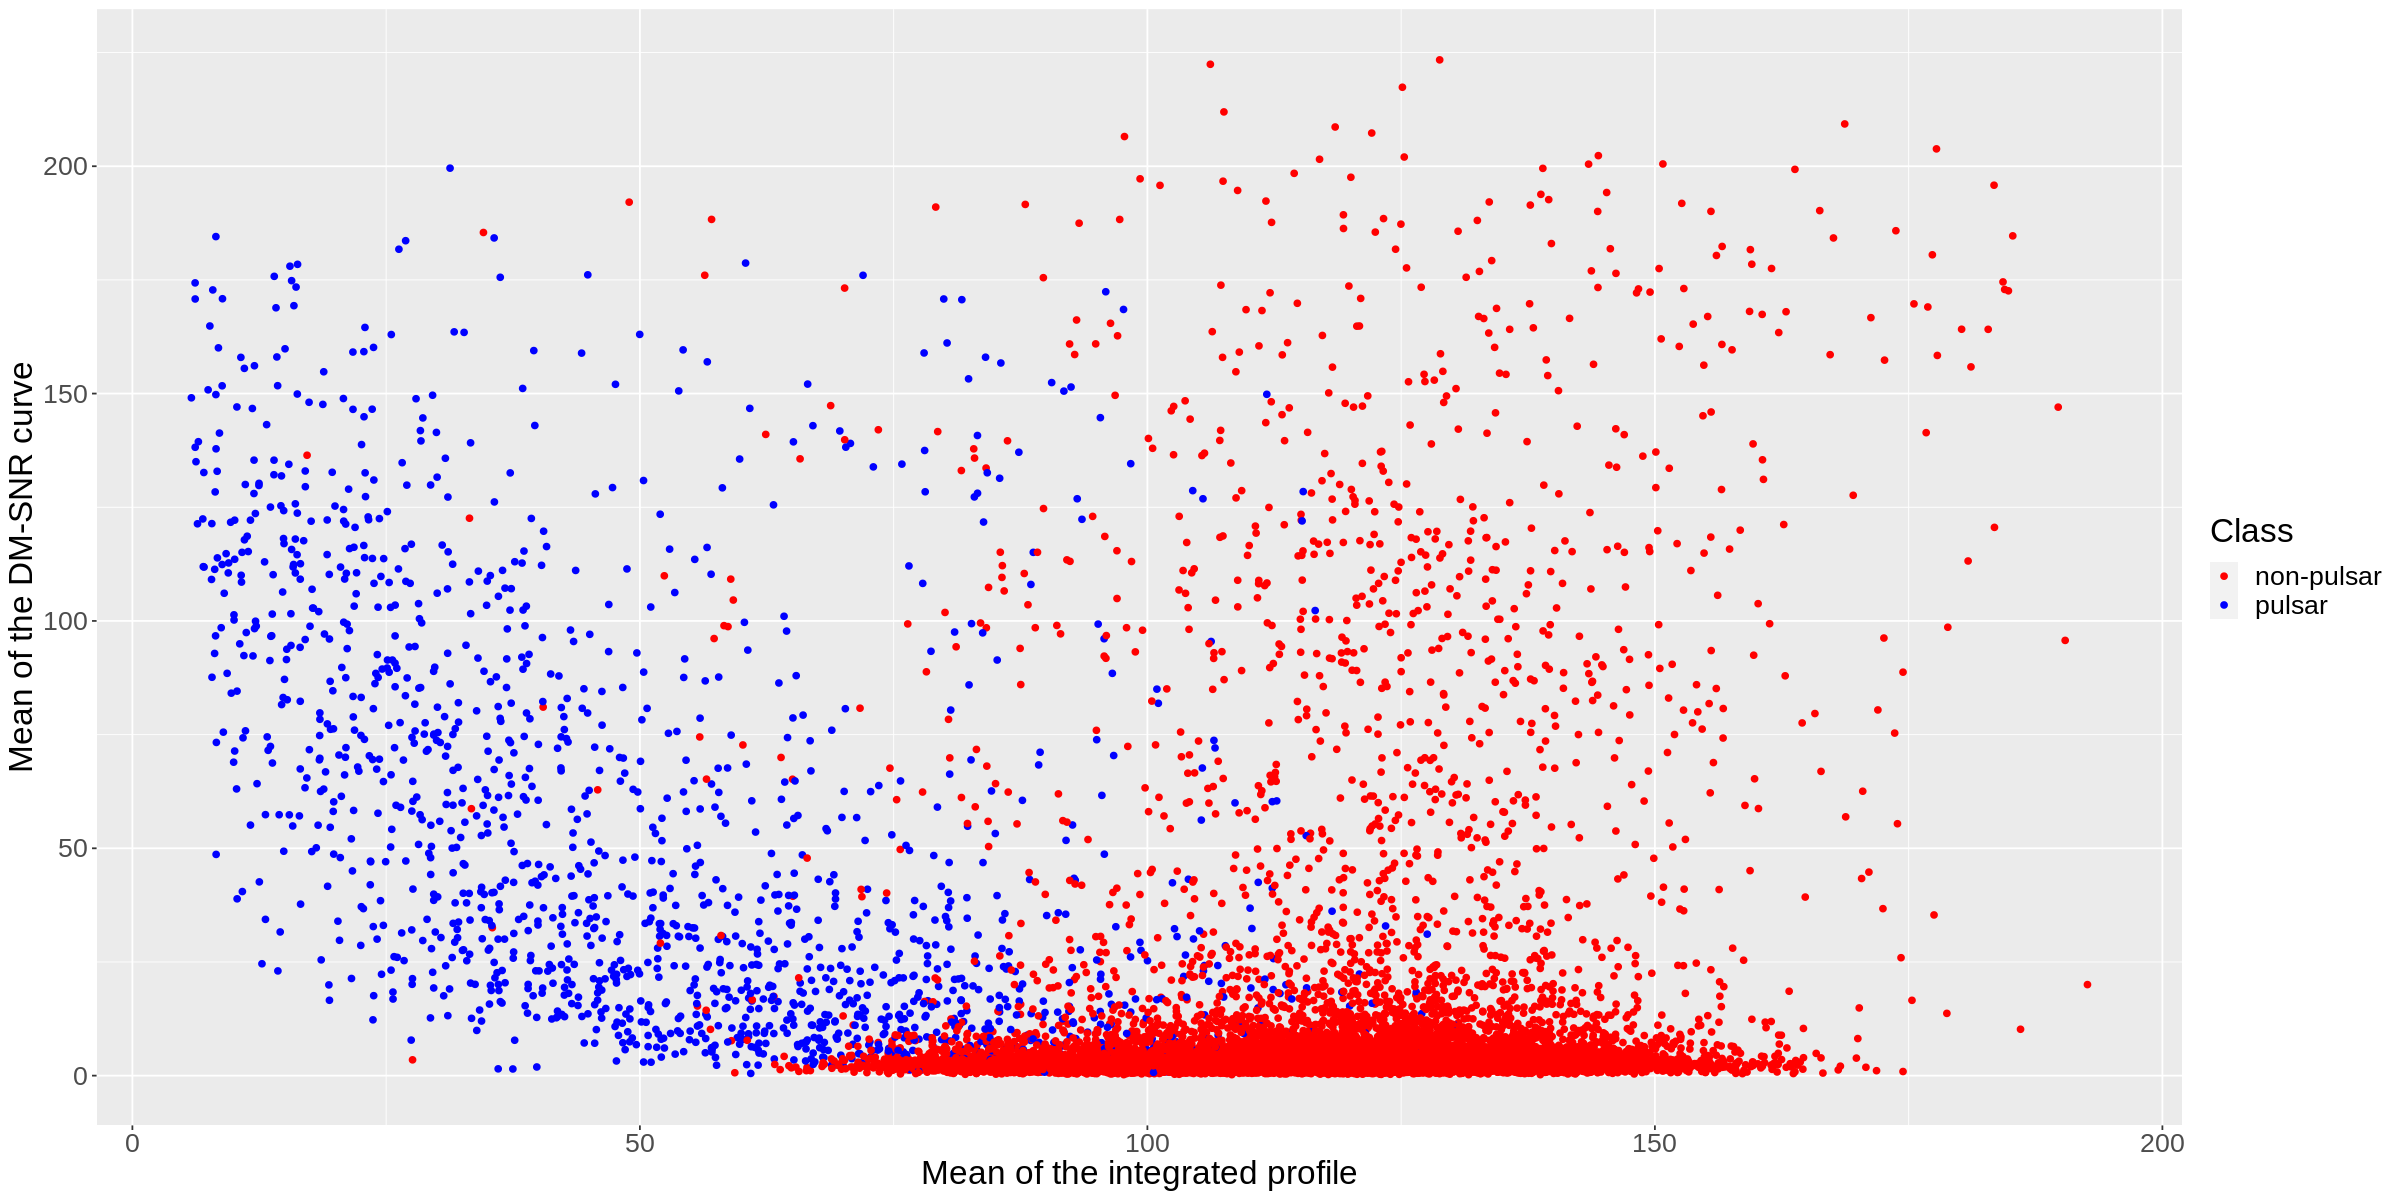

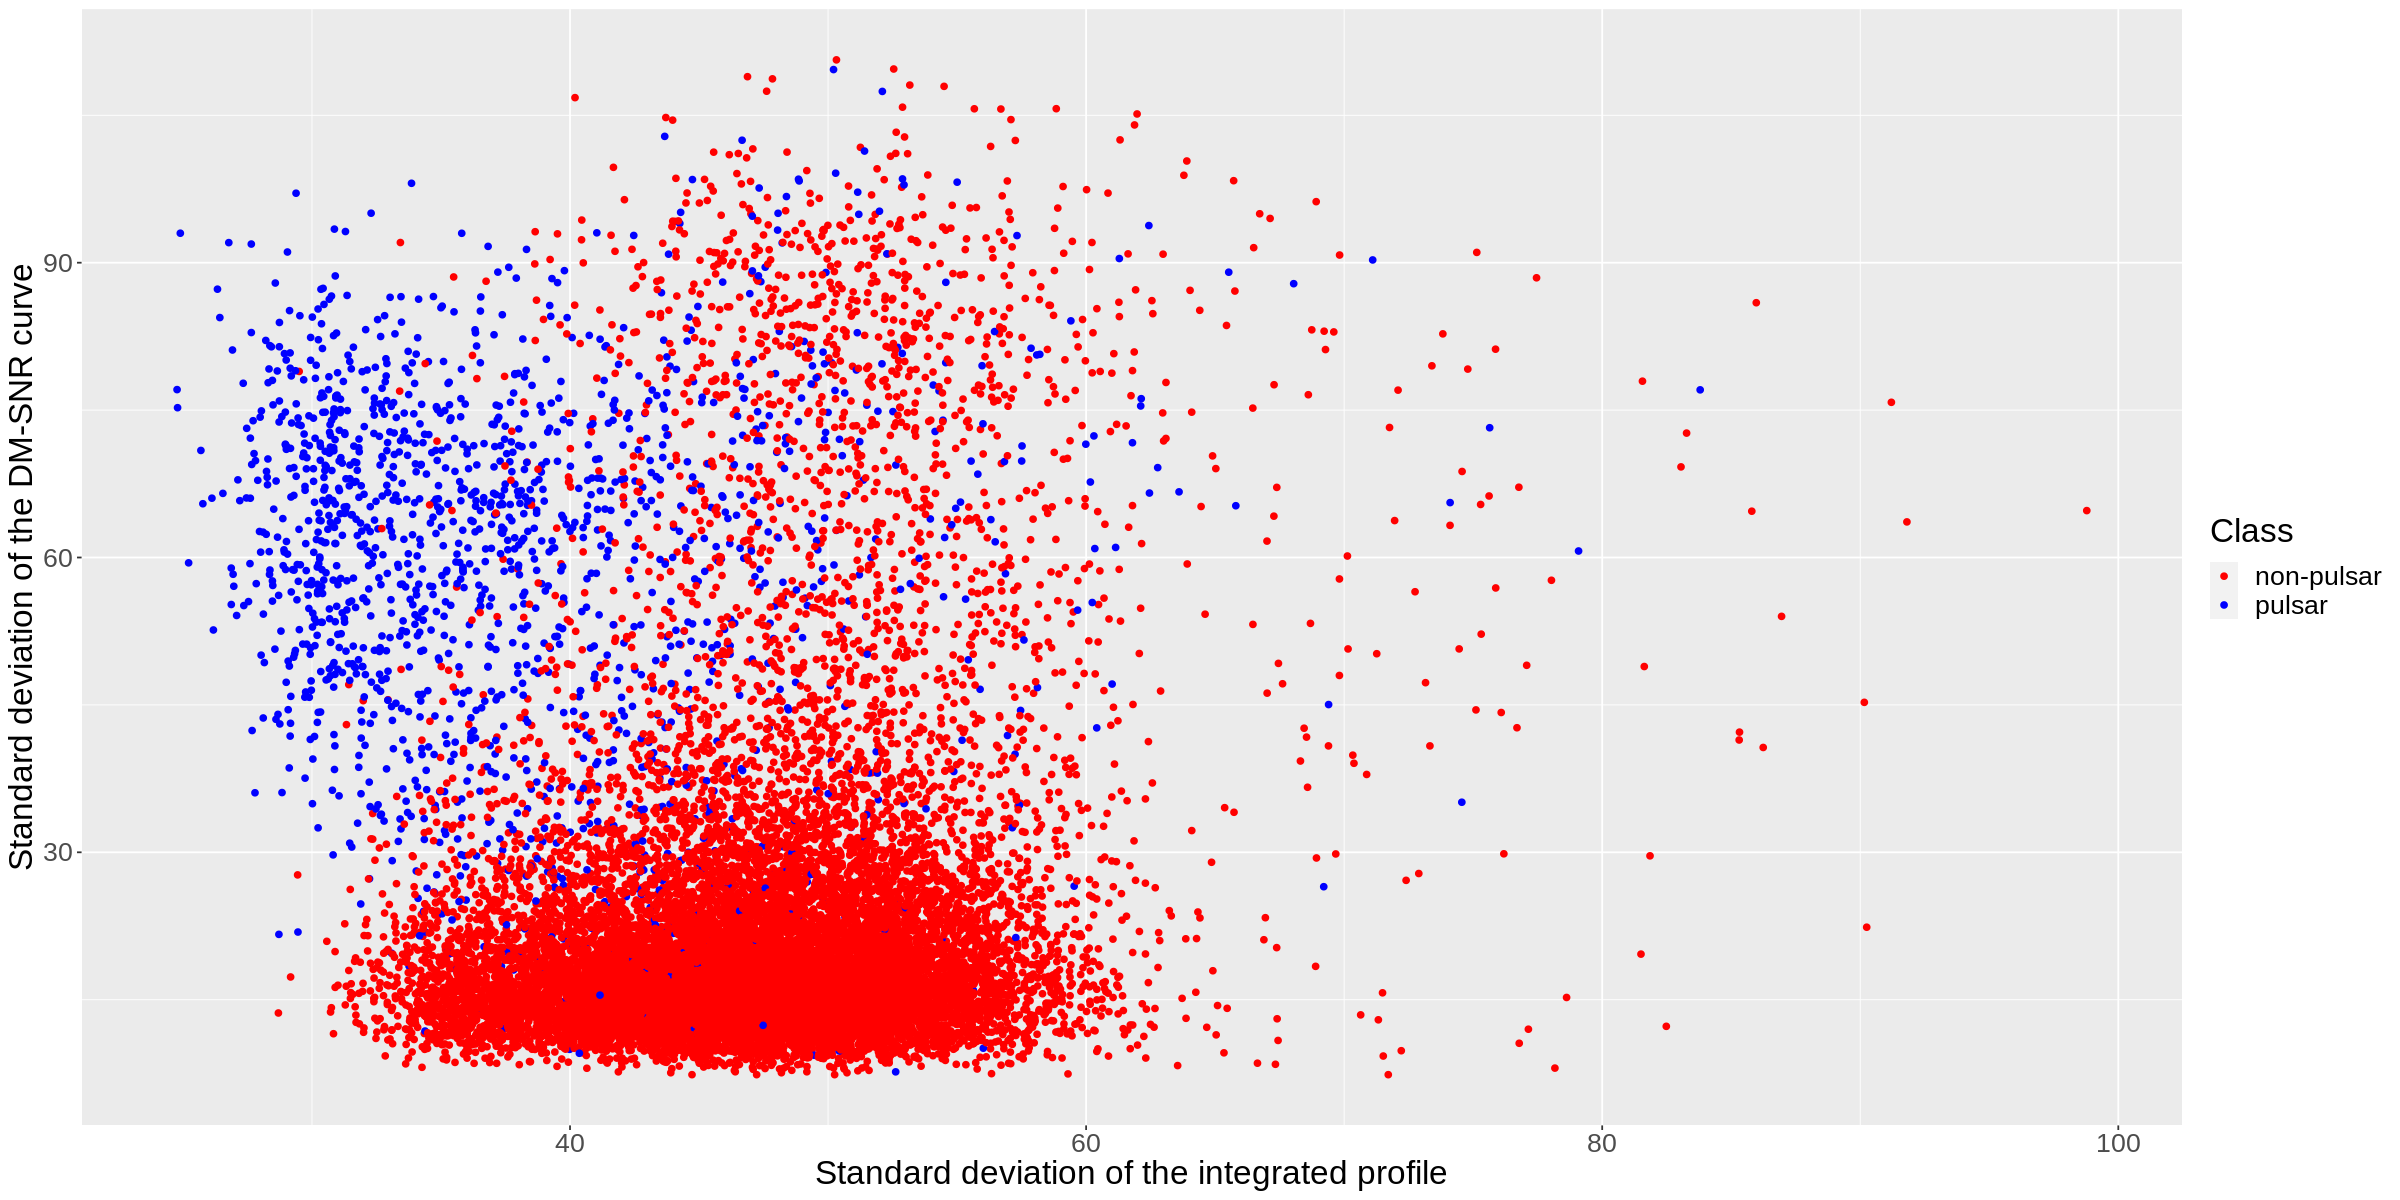

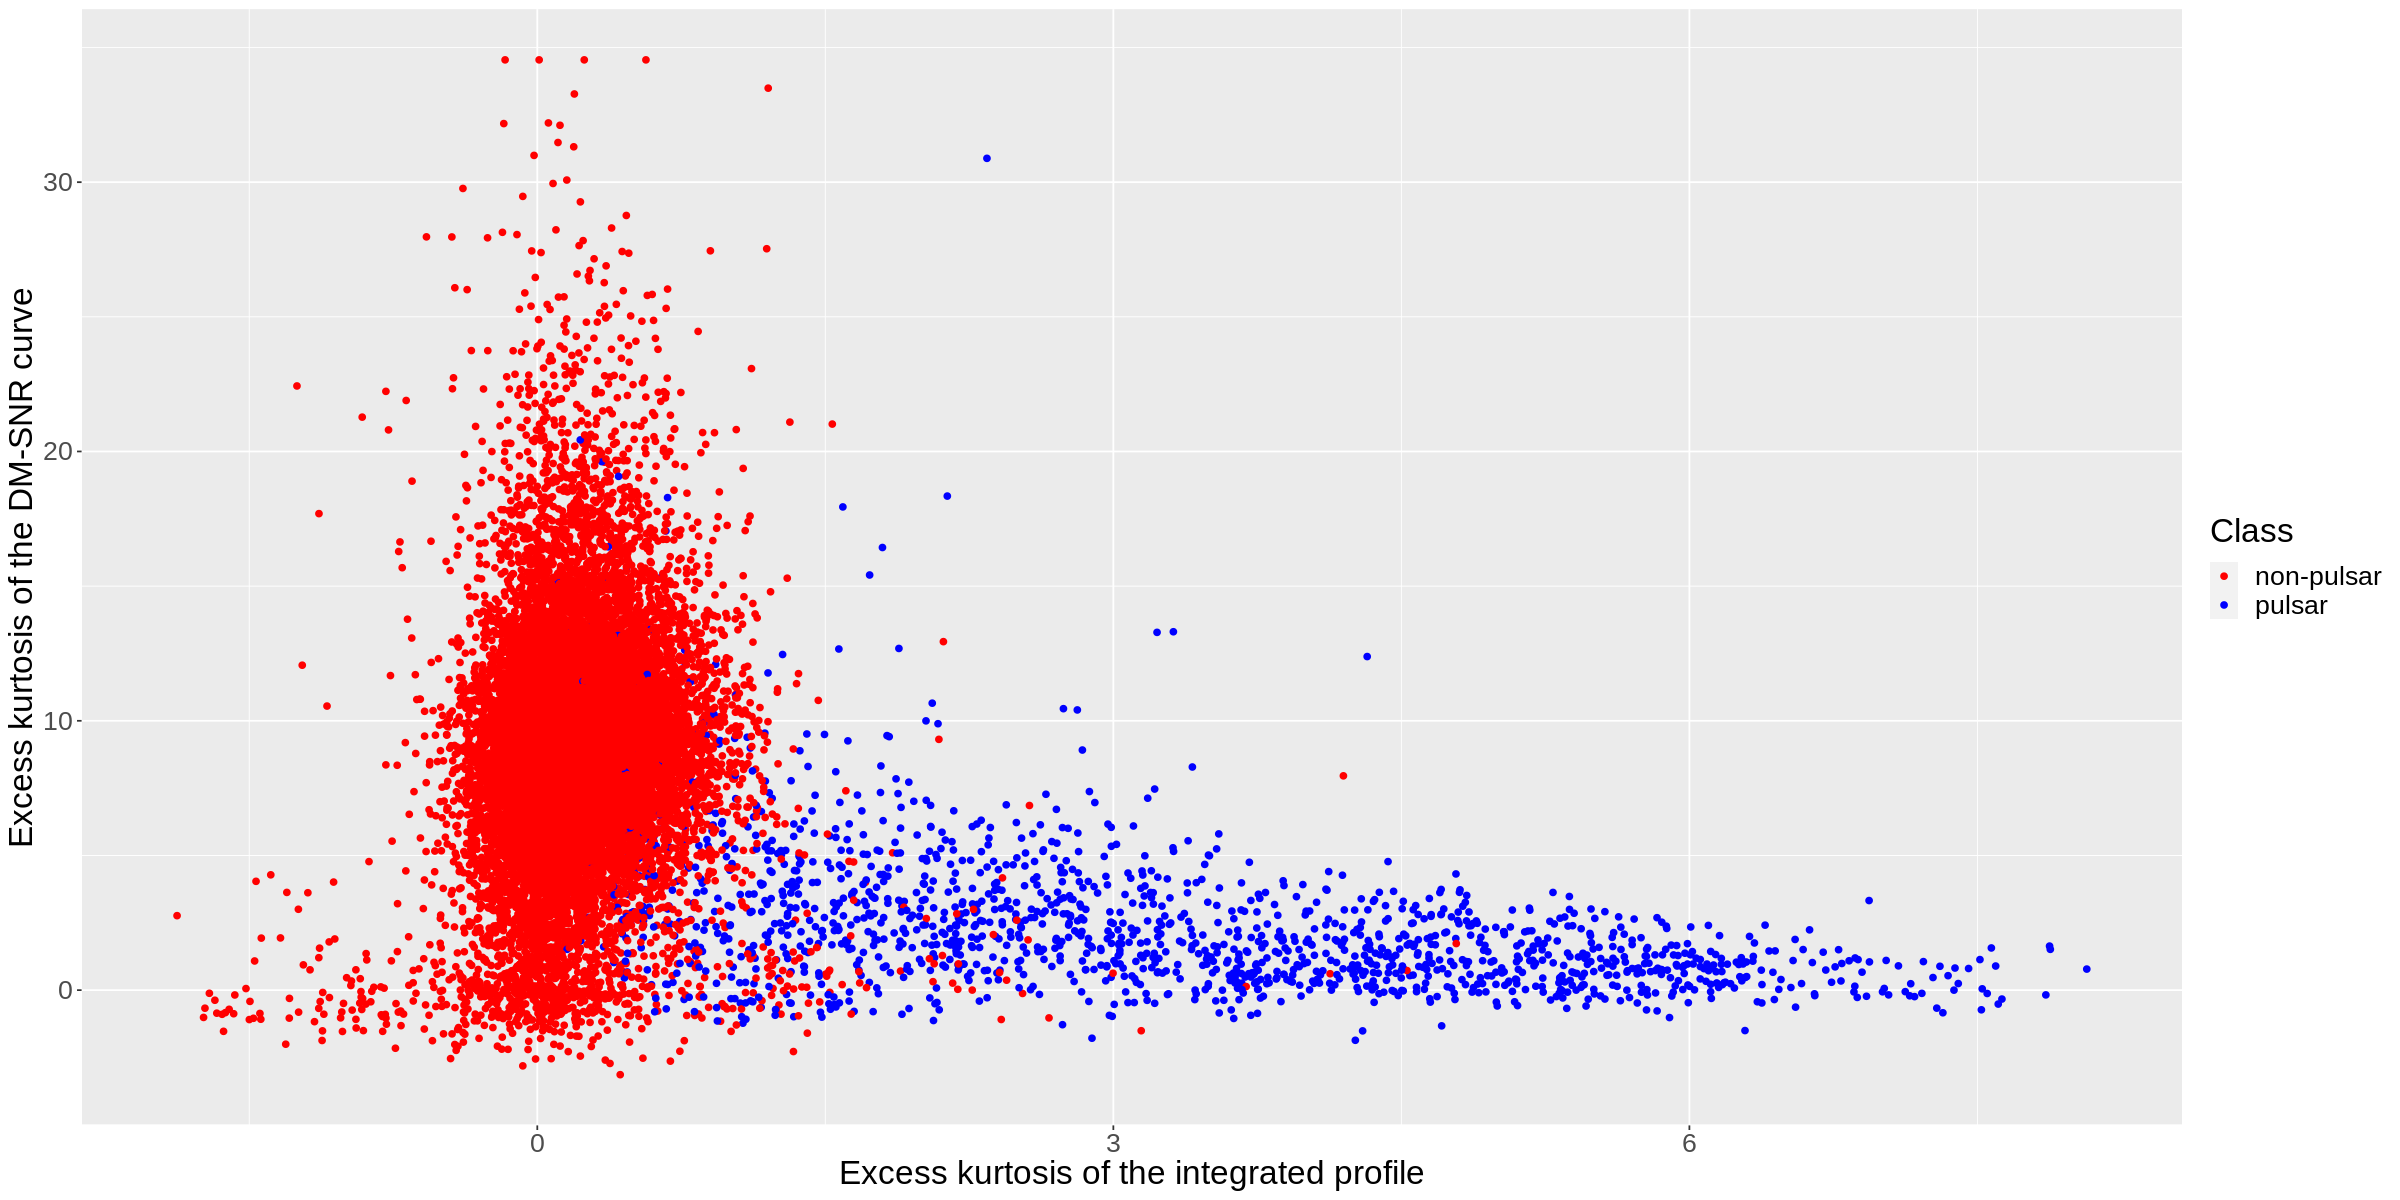

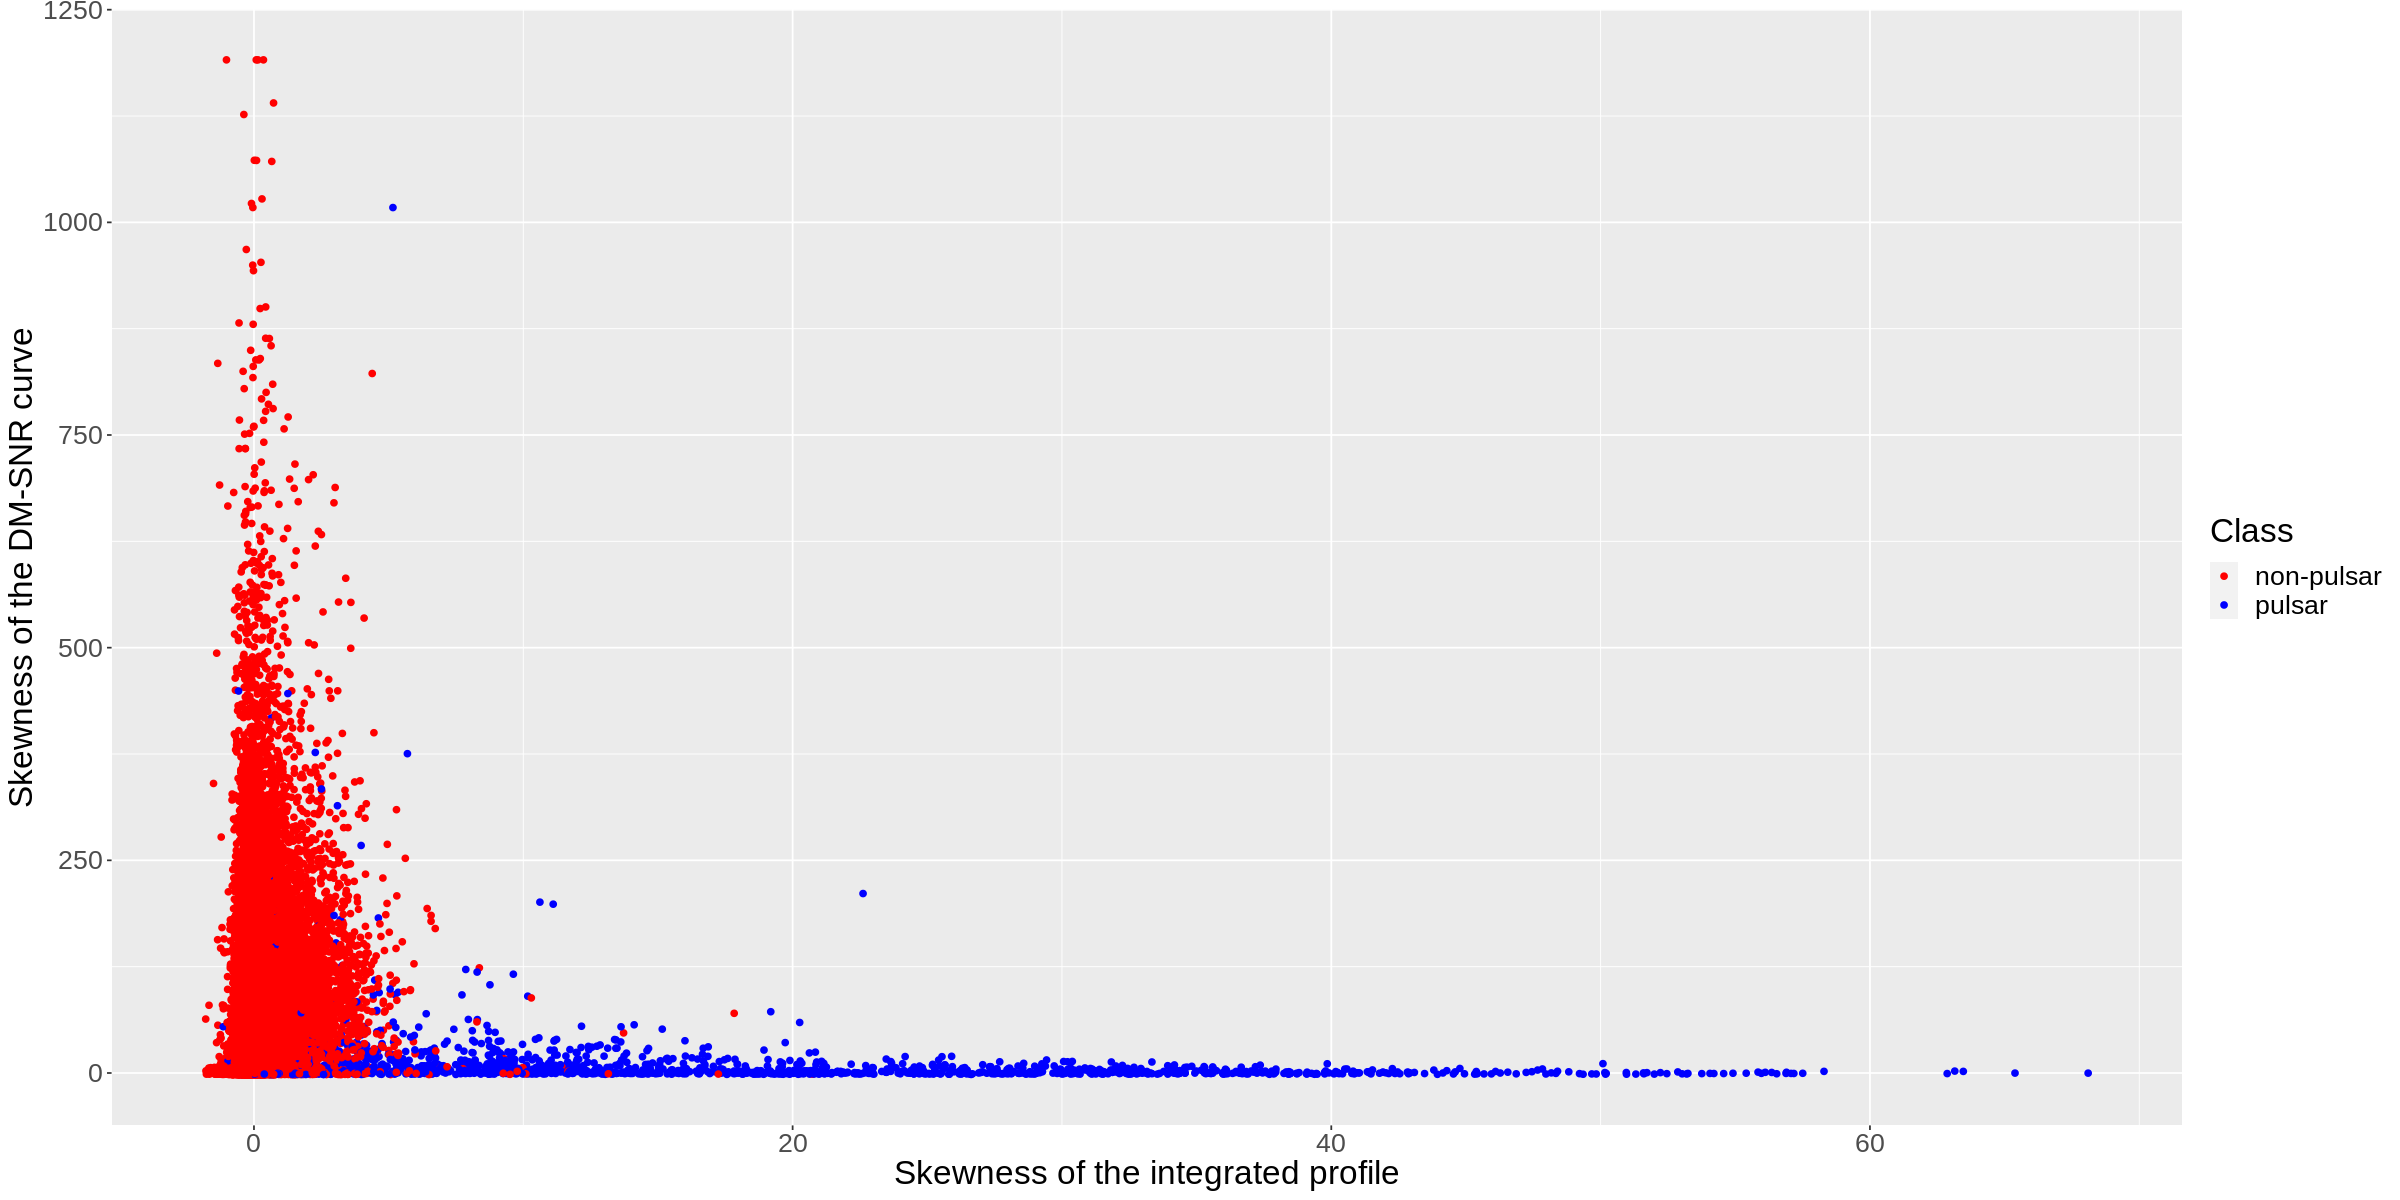

In [11]:
options(repr.plot.width = 20, repr.plot.height = 10)
pulsar_plot_mean <- pulsar_data %>%
    ggplot(aes(x = Mean.of.the.integrated.profile , y = Mean.of.the.DM.SNR.curve, colour = Class)) + 
        geom_point() +
        labs(x = "Mean of the integrated profile", y = "Mean of the DM-SNR curve", colour = "Class") +
        scale_color_manual(labels = c("non-pulsar", "pulsar"), values = c("red", "blue")) +
        theme(text = element_text(size=20))

pulsar_plot_mean



options(repr.plot.width = 20, repr.plot.height = 10) 
pulsar_plot_sd <- pulsar_data %>%
    ggplot(aes(x = Standard.deviation.of.the.integrated.profile , y = Standard.deviation.of.the.DM.SNR.curve, color = Class)) + 
        geom_point() +
        labs(x = "Standard deviation of the integrated profile", y = "Standard deviation of the DM-SNR curve", colour = "Class") +
        scale_color_manual(labels = c("non-pulsar", "pulsar"), values = c("red", "blue")) +
        theme(text = element_text(size=20))

pulsar_plot_sd



options(repr.plot.width = 20, repr.plot.height = 10) 
pulsar_plot_excess <- pulsar_data %>%
    ggplot(aes(x = Excess.kurtosis.of.the.integrated.profile , y = Excess.kurtosis.of.the.DM.SNR.curve, colour = Class)) + 
        geom_point() +
        labs(x = "Excess kurtosis of the integrated profile", y = "Excess kurtosis of the DM-SNR curve", colour = "Class") + 
        scale_color_manual(labels = c("non-pulsar", "pulsar"), values = c("red", "blue")) +
        theme(text = element_text(size=20))

pulsar_plot_excess


options(repr.plot.width = 20, repr.plot.height = 10) 
pulsar_plot_skewness <- pulsar_data %>%
    ggplot(aes(x = Skewness.of.the.integrated.profile , y = Skewness.of.the.DM.SNR.curve, colour = Class)) + 
        geom_point() +
        labs(x = "Skewness of the integrated profile", y = "Skewness of the DM-SNR curve", colour = "Class") +
        scale_color_manual(labels = c("non-pulsar", "pulsar"), values = c("red", "blue")) +
        theme(text = element_text(size=20))

pulsar_plot_skewness



### Methods

We will be classifying candidates from the HTRU2 data set as either pulsars or RFI/noise based on the variables 'mean of integrated profile', 'excess kurtosis of integrated profile', and 'skewness of integrated profile'. These variables were chosen because they have the strongest correlation with the pulsar or RFI/noise classification variable (Lyon, https://www.research.manchester.ac.uk/portal/files/54588348/FULL_TEXT.PDF, page 229).

We will use the k-nearest neighbors algorithm using straight-line distance for our analysis. We will visualize our findings with graphs showing the candidates classified using our algorithm.

### Expected Outcomes

Our expected outcomes were to develop an algorithm to determine which of the data points (pulsar candidates) within the set are pulsar and which are non-pulsar, so that if given an unknown data point (a pulsar candidate), we would be able to accurately predict whether it would be a pulsar or not.

Such findings will help scientists focus only on pulsar stars as they are of high interest to scientific study. Currently, it is difficult to determine whether pulsar candidates are real pulsar stars or not, so having an algorithm to predict the pulsar status would greatly improve efficiency.